# Basic EDA on NY Airbnb data

### Nothing very interesting - just practicing some graph generations

##### Load libraries & data

In [139]:
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [143]:
df = pd.read_csv('../data/AB_NYC_2019.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [141]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [142]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Find the nulls

In [37]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [36]:
df['reviews_per_month'].fillna(0, inplace = True)

#### Adding 'reviewed' column - checking if last_review has a value, if not, setting to 0

In [51]:
df['reviewed'] = np.where(df['last_review'].isnull(), False, True)

In [54]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviewed
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,True
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,True
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,True
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,True


### Looking at unique values of certain columns:

In [58]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [59]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Average price by neighbourhood

In [145]:
neighbourhood = df.groupby(['neighbourhood_group'], as_index=False)['price'].mean()
neighbourhood

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


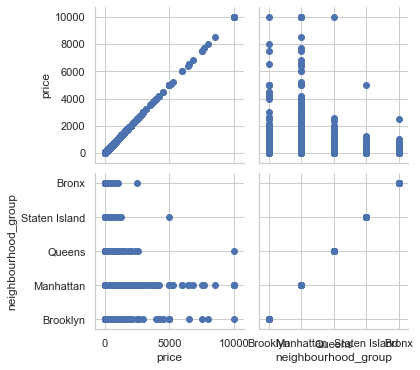

In [150]:
g = sns.PairGrid(df, vars=["price", "neighbourhood_group"])
g.map(plt.scatter)

In [174]:
for i in df['neighbourhood_group'].unique():
    print(i)


Brooklyn
Manhattan
Queens
Staten Island
Bronx


In [179]:
axs
for i in df['neighbourhood_group'].unique():
    
df[['neighbourhood_group','price']].loc[df['neighbourhood_group'] == i]

,neighbourhood_group,price
171,Bronx,40
207,Bronx,45
260,Bronx,90
261,Bronx,105
309,Bronx,90
...,...,...
48783,Bronx,140
48792,Bronx,80
48795,Bronx,125
48796,Bronx,70


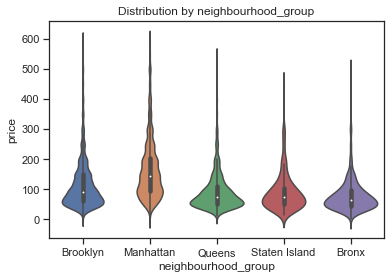

In [234]:
# Setting price < 600, since most prices lie below this
with sns.axes_style(style='ticks'):
    g = sns.violinplot("neighbourhood_group", "price",  data=df.loc[df['price']<600], kind="box")
    g.set_title('Distribution by neighbourhood_group')

Text(0.5, 1.0, 'Average Price by Neighbourhood')

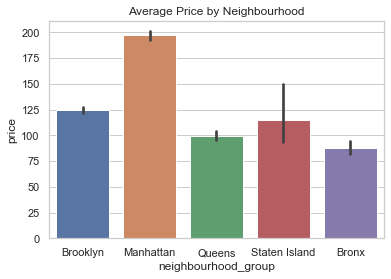

In [235]:
nhood = sns.barplot(x="neighbourhood_group", y='price', data = df)
nhood.set_title('Average Price by Neighbourhood')

### Investigation into the most reviewed people

Thought it would be interesting to see where the top n hosts are based?

Couple of obvious questions:
- Where are most of their listings?
- What's their average price?
- What kind of listings are they?

While it goes without saying lots of positive reviews are always good - it's interesting to see what type of person 

Here's a reminder what the data looks like:

In [236]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [136]:
most_reviewed = df.groupby(['host_name','host_id'], as_index = False)['reviewed'].sum().sort_values('reviewed', ascending = False)
most_reviewed[:50]

,host_name,host_id,reviewed
33222,Sonder (NYC),219517861,207.0
7792,Corporate Housing,61391963,79.0
16540,Jeremy & Laura,16098958,61.0
19601,Kazuya,137358866,51.0
36042,Vida,7503643,49.0
17494,John,190921808,46.0
18968,Kara,30283594,43.0
25746,Mike,1475015,42.0
33463,Stanley,120762452,40.0
19762,Ken,22541573,39.0


#### Where are Sonder's listings?

In [248]:
df.loc[df['host_id'] == 219517861][['neighbourhood_group','neighbourhood']].groupby('neighbourhood').count()

,neighbourhood_group
neighbourhood,
Chelsea,7
Financial District,218
Hell's Kitchen,15
Midtown,4
Murray Hill,50
Theater District,27
Upper East Side,6


### TBC ....